<a href="https://colab.research.google.com/github/hkaragah/risk_reliability/blob/main/Prior_and_Posterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Statistics: Prior and Posterior Distributions

In Bayesian statistics, the concepts of prior and posterior distributions are fundamental. They represent our knowledge about a parameter or a set of parameters before and after observing data, respectively.<br>

**Prior Distribution**<br>

The prior distribution represents our beliefs or knowledge about the parameters of a model before observing any data. It is an essential component of Bayesian inference as it allows us to incorporate previous knowledge or assumptions into the analysis.<br>

* _Notation_: The prior distribution is often denoted as $p(θ)$, where $θ$ represents the parameter or parameters of interest.<br>

* _Example_: If we are estimating the probability $p$ of a coin landing heads, a prior might be $p(p) \sim Beta(\alpha,\beta)$, reflecting our belief about the likelihood of different values of $p$ before seeing any coin flips.<br><br>


**Posterior Distribution**<br>

The posterior distribution represents our updated beliefs about the parameters after observing the data. It combines the information from the prior distribution with the likelihood of the observed data.

* _Notation_: The posterior distribution is denoted as $p(θ|D)$, where $D$ represents the observed data.<br>

* _Bayes' Theorem_: The posterior distribution is calculated using Bayes' theorem:

$$p(θ|D)=\frac{p(D|θ)p(θ)}{p(D)}$$

Here, $p(D|θ)$ is the likelihood of the data given the parameters, $p(θ)$ is the prior distribution, and $p(D)$ is the marginal likelihood (a normalizing constant to ensure the posterior is a valid probability distribution).<br><br>

**Example: Coin Toss**<br>
Suppose we are interested in estimating the probability $p$ of getting heads in a coin toss, and we start with a prior belief that $p$ is uniformly distributed between 0 and 1, i.e., $p(p) \sim Beta(1,1)$.<br>

1. Prior Distribution:<br>

$$p(p)=1 \quad \textrm{for} \quad p \in [0,1]$$

2. Observed Data:<br>
Let's say we observe 3 heads and 1 tail in 4 coin flips. The likelihood of the data given $p$ (assuming flips are independent) is:

$$p(D|p) = p^3 (1-p)^1$$

3. Posterior Distribution:<br>
Using Bayes' theorem:

$$p(p|D) \propto p(D|p) \cdot p(p) = p^3(1-p) \cdot 1 = p^3(1-p)$$

This is a Beta distribution with parameters $\alpha = 4$ and $\beta = 2$, i.e., $p(p|D) \sim Beta(4,2)$.

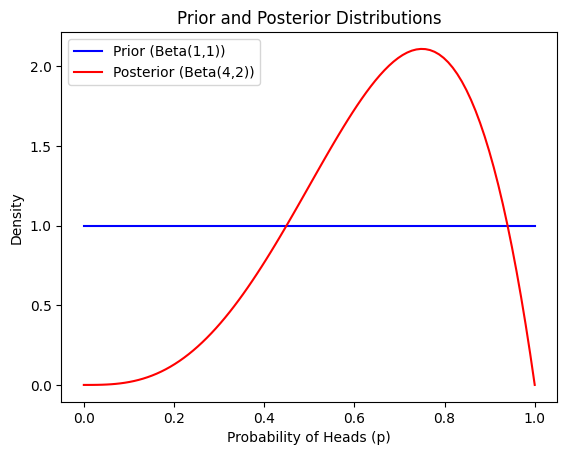

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist

# Define the prior (Beta(1, 1))
alpha_prior, beta_prior = 1, 1
x = np.linspace(0, 1, 100)
prior = beta_dist.pdf(x, alpha_prior, beta_prior)

# Define the posterior (Beta(4, 2))
alpha_post, beta_post = 4, 2
posterior = beta_dist.pdf(x, alpha_post, beta_post)

# Plot the prior and posterior distributions
plt.plot(x, prior, label='Prior (Beta(1,1))', color='blue')
plt.plot(x, posterior, label='Posterior (Beta(4,2))', color='red')
plt.xlabel('Probability of Heads (p)')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.show()


## Beta Distribution

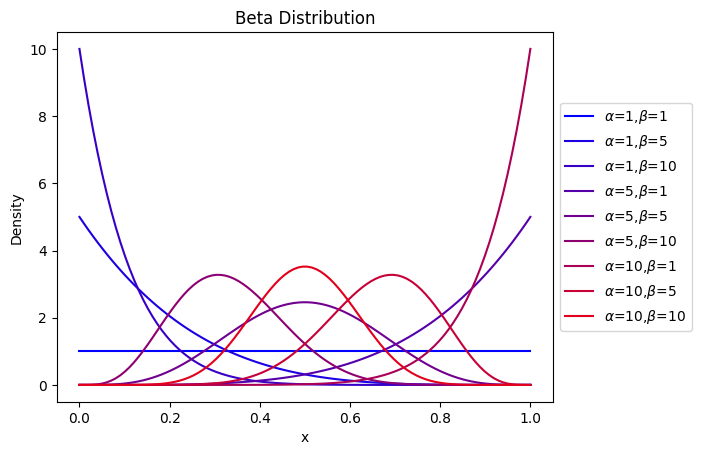

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from scipy.stats import beta as beta_dist

alpha_list = [1, 5, 10]
beta_list = [1, 5, 10]
x = np.linspace(0, 1, 100)

# Create a blue colormap
cmap = LinearSegmentedColormap.from_list('gradient', ['blue', 'red'])
norm = Normalize(vmin=0, vmax=len(alpha_list) * len(beta_list))

for i, alpha in enumerate(alpha_list):
    for j, beta in enumerate(beta_list):
        color = cmap(norm(i * len(beta_list) + j))
        plt.plot(x, beta_dist.pdf(x, alpha, beta), color=color, label=f'$\\alpha$={alpha},$\\beta$={beta}')

plt.xlabel('x') # random variable
plt.ylabel('Density')
plt.title('Beta Distribution')

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
